# Simulation damped harmonic oscillator

\begin{equation}
\frac{d^2x(t)}{dt^2} + 2\gamma \omega_0 \frac{dx(t)}{d(t)} + \omega_0^2x(t)=0
\end{equation}

where $x(t)$ is the posision of the oscillator at time t, $\omega_0$ is the frequency for the undamped case and $\gamma$ is the damping ratio.  

In [1]:
# Import libs
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
sympy.init_printing()

In [2]:
# Construct ODE
t, omega0, gamma= sympy.symbols("t, omega_0, gamma", positive=True)
x = sympy.Function("x")
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0**2 * x(t)
sympy.dsolve(ode)

Since this is a second-order ODE, there are two undetermined integration constants in the general solution. We need to specify initial conditions for both the position $x(0)$ and the velocity $\left.\frac{dx(t)}{dt}\right|_{t_0}$ to single out a particular solution to the ODE. 

In [3]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}
ics

⎧         ⎛d       ⎞│      ⎫
⎨x(0): 1, ⎜──(x(t))⎟│   : 0⎬
⎩         ⎝dt      ⎠│t=0   ⎭

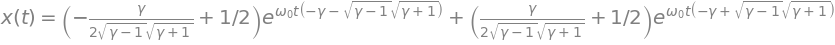

In [4]:
x_t_sol = sympy.dsolve(ode, ics=ics)
x_t_sol

This is the solution for the dynamics of the oscillator for arbitrary values of $t, \omega_0$ and $\gamma$, where we used the initial condition $x(0)=1$ and $\left.\frac{dx(t)}{dt}\right|_{t_0}$. However, substituting $\gamma=1$, which corresponds to critical damping, directly into this expression results in a division by zero error, and for this particular choice of γ, we need to be careful and compute the limit where $γ \rightarrow 1$.

In [5]:
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)
x_t_critical

Finally, we plot the solutions for $\omega_0 = 2\pi$ and a sequence of different values of the damping ratio $\gamma$

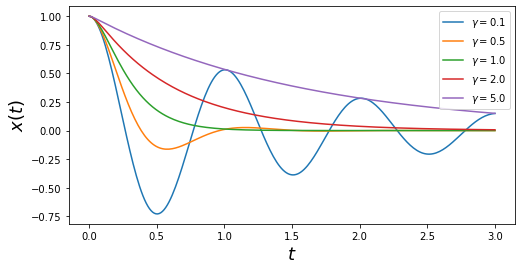

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
tt = np.linspace(0, 3, 250)
w0 = 2 * sympy.pi

for g in [0.1, 0.5, 1, 2.0, 5.0]:
  if g == 1:
    x_t = sympy.lambdify(t, x_t_critical.subs({omega0: w0}), 'numpy')
  else:
    x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: w0, gamma: g}), 'numpy')
  ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)

ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x(t)$", fontsize=18)
ax.legend()

For $\gamma < 1$, the oscillator is underdamped, and we see oscillatory solutions. For $\gamma > 1$ the oscillator is overdamped and decays monotonically. The crossover between these two behaviors occurs at the critical damping ratio $\gamma = 1$.